<a href="https://colab.research.google.com/github/wsilveira-splunk/projeto_final_ciencia_dados_02_2020/blob/new_data/projeto_final_ciencia_dados_02_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Precificação para Geração Distribuída na Rede de Distribuição de Energia**

## Descrição:
O modelo utilizado atualmente para a Geração Distribuída (geradores instalados nas redes de distribuição) não abrange os impactos que esses geradores causam na rede, tanto os bons quanto os ruins, não diferenciando a tarifa paga por estes (todos pagam a mesma tarifa independentemente da localização). O modelo locacional é construído para capturar boa parte desses impactos e, por isso é o utilizado como exemplo a ser seguido para criar uma forma de precificação justa para a geração distribuída e para a rede.

O objetivo deste trabalho é propor um modelo de precificação para geração distribuída para o sistema de distribuição baseado no modelo existente de precificação do sistema de transmissão, especificamente utilizando o modelo da parcela locacional, utilizado no cálculo da tarifa de uso do sistema de transmissão, como referência.





Clone Git Repo if it is not already cloned.

In [4]:
%%bash

cd /content/

if [ -d "projeto_final_ciencia_dados_02_2020" ]; then
    cd projeto_final_ciencia_dados_02_2020
    git pull origin new_data
    cd -
else
  git clone https://github.com/wsilveira-splunk/projeto_final_ciencia_dados_02_2020.git
  git checkout new_data
fi

Updating 5ab4ea1..d4e0425
Fast-forward
 .../4950_PCAT_Cemig-D_- P\303\263s Recurso.xlsx"   |   Bin 5463229 -> 0 bytes
 dados/Geradores_at_cemig.xlsx                      |   Bin 9703 -> 0 bytes
 dados/Geradores_bt_cemig1.xlsx                     |   Bin 685307 -> 0 bytes
 dados/Geradores_mt_cemig.xlsx                      |   Bin 18602 -> 0 bytes
 dados/TUST 2020/Com resultados/2020-2021.CDI       |  5229 ----
 dados/TUST 2020/Com resultados/2020-2021.CTR       |  1691 --
 dados/TUST 2020/Com resultados/2020-2021.DC        | 21477 ----------------
 dados/TUST 2020/Com resultados/2020-2021.DDC       | 20624 ---------------
 dados/TUST 2020/Com resultados/2020-2021.DES       |  1414 --
 dados/TUST 2020/Com resultados/2020-2021.DUN       | 21479 ----------------
 dados/TUST 2020/Com resultados/2020-2021.DUS       |  4304 ----
 dados/TUST 2020/Com resultados/2020-2021.GER       |  2123 --
 dados/TUST 2020/Com resultados/2020-2021.NFC       | 15456 -----------
 dados/TUST 2020/Com resultado

From https://github.com/wsilveira-splunk/projeto_final_ciencia_dados_02_2020
 * branch            new_data   -> FETCH_HEAD


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
dataset_path = r'projeto_final_ciencia_dados_02_2020/dados/projecao_precos.csv'

df = pd.read_csv(dataset_path, sep=';') 

df.head

<bound method NDFrame.head of              dia         mes  ...  carga_n  pld_medio_se 
0     17/01/2013  01/01/2013  ...     3976         339.83
1     18/01/2013  01/01/2013  ...     4016         339.83
2     19/01/2013  01/01/2013  ...     3937         479.82
3     20/01/2013  01/01/2013  ...     3750         479.82
4     21/01/2013  01/01/2013  ...     4091         479.82
...          ...         ...  ...      ...            ...
1457  13/01/2017  01/01/2017  ...     5069         101.24
1458  14/01/2017  01/01/2017  ...     4831         128.50
1459  15/01/2017  01/01/2017  ...     4670         128.50
1460  16/01/2017  01/01/2017  ...     5146         128.50
1461  17/01/2017  01/01/2017  ...     5149         128.50

[1462 rows x 23 columns]>

In [7]:
df.shape

(1462, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dia                         1462 non-null   object 
 1   mes                         1462 non-null   object 
 2   armazenamento_sin           1462 non-null   float64
 3   armazenamento_se            1462 non-null   float64
 4   armazenamento_s             1462 non-null   float64
 5   armazenamento_ne            1462 non-null   float64
 6   armazenamento_n             1462 non-null   float64
 7   ena_sin                     1462 non-null   float64
 8   ena_se                      1462 non-null   float64
 9   ena_s                       1462 non-null   float64
 10  ena_ne                      1462 non-null   float64
 11  ena_n                       1462 non-null   float64
 12  expectativa_ena_7_dias_sin  1462 non-null   float64
 13  expectativa_ena_7_dias_se   1462 

In [9]:
df.describe()

,armazenamento_sin,armazenamento_se,armazenamento_s,armazenamento_ne,armazenamento_n,ena_sin,ena_se,ena_s,ena_ne,ena_n,expectativa_ena_7_dias_sin,expectativa_ena_7_dias_se,expectativa_ena_7_dias_s,expectativa_ena_7_dias_ne,expectativa_ena_7_dias_n,carga_sin,carga_se,carga_s,carga_ne,carga_n,pld_medio_se
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,0.407038,0.398303,0.726590,0.271520,0.574634,0.927945,0.920997,1.400809,0.451167,0.739311,52559.730207,31538.059680,11653.446027,3692.191328,5676.033172,61638.376881,36270.207934,10596.883037,9675.351573,5095.934337,329.579439
std,0.113798,0.126739,0.198908,0.119740,0.245628,0.321124,0.286459,0.950843,0.206575,0.265930,20179.588975,15325.360027,6038.236465,3178.313787,4781.634810,5574.427358,3574.304537,1422.584509,750.177014,447.671479,246.537669
min,0.188954,0.151234,0.304685,0.045996,0.149990,0.340121,0.251365,0.266256,0.106232,0.163263,22944.387070,10754.226630,3401.663400,692.967100,913.793100,47058.000000,26732.000000,7177.000000,1729.000000,3727.000000,30.250000
25%,0.320920,0.327357,0.566145,0.172481,0.352689,0.730680,0.759537,0.738604,0.314417,0.530503,37162.000000,20032.305860,7384.902300,1686.000000,1615.918300,58451.500000,34151.000000,9678.000000,9225.500000,4920.250000,140.710000
50%,0.402954,0.370591,0.770984,0.266270,0.571858,0.857561,0.897911,1.134217,0.429371,0.723611,47670.543910,27049.025750,10313.593700,2496.000000,3504.870000,61998.500000,36331.000000,10819.000000,9761.000000,5190.500000,270.230000
75%,0.486435,0.491432,0.908205,0.374154,0.809428,1.052339,1.055971,1.796647,0.538438,0.912571,67133.661700,40201.868600,13719.601700,4730.158100,9472.657300,65333.750000,38679.750000,11398.250000,10172.000000,5374.750000,388.480000
max,0.633005,0.639768,0.992234,0.496384,0.966706,2.698573,2.347195,9.074481,1.483796,2.097385,120672.816300,99143.769550,37450.263800,19046.719600,18975.246900,75723.000000,45393.000000,15078.000000,20251.000000,8231.000000,822.830000


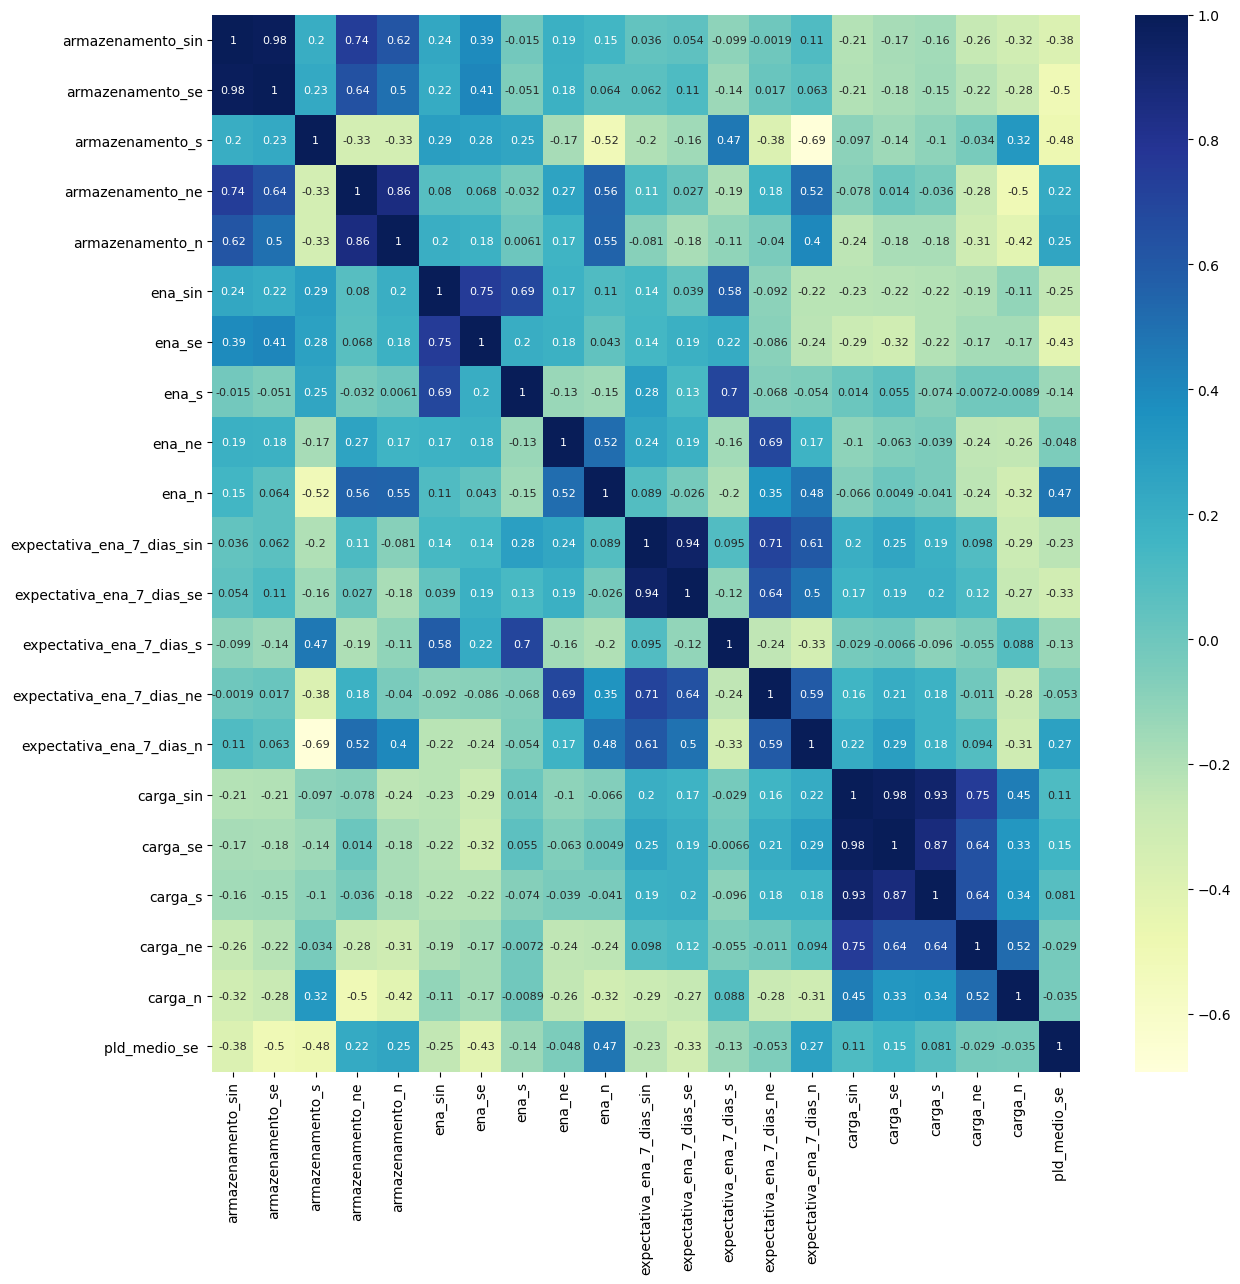

In [10]:
fig=plt.figure(figsize=(14,14), dpi= 100, facecolor='w', edgecolor='k')

sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, annot_kws={"size":8})
plt.show()